In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np

In [126]:
group1Participants = [10,11,12,13] 
startAnnotation = datetime.datetime(2023,3,30,0,0,0,0,tzinfo=pytz.timezone('UTC'))
startCoordination = datetime.datetime(2023,4,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))

annotations = pd.read_json("annoations10052023.json")

annotations = pd.DataFrame(annotations.fields.values.tolist())

annotations['start'] = pd.to_datetime(annotations['start'],infer_datetime_format=True)

annotations = annotations.loc[annotations['user'].isin(group1Participants)] 
annotations = annotations.loc[annotations['start']>= startAnnotation ] 

annotations

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
37,2023-03-30 07:00:00+00:00,7200,washing_and_drying,Breakfast. Kettle. Toaster.,"This is breakfast time. However, the washing m...",1.130984,8,electricity_consumption,10,2023-03-30T08:34:55.444Z,2023-03-30T08:34:55.445Z
43,2023-03-30 14:30:00+00:00,1800,kettle,tea!,,0.054837,10,electricity_consumption,11,2023-03-30T14:45:15.525Z,2023-03-30T14:45:15.525Z
44,2023-03-30 09:00:00+00:00,3600,washing_and_drying,Dryer still running as well as 2 computers plu...,Flexible,0.504983,8,electricity_consumption,10,2023-03-30T15:34:22.315Z,2023-03-30T15:34:22.315Z
45,2023-03-30 12:00:00+00:00,5400,washing_and_drying,"Lunch, plus more drying",Flexible,0.575878,8,electricity_consumption,10,2023-03-30T15:35:03.741Z,2023-03-30T15:35:03.741Z
46,2023-03-30 15:00:00+00:00,1800,toaster,Afternoon snack before working at laptop,No. Needed to eat something quick.,0.232273,8,electricity_consumption,10,2023-03-30T15:37:16.571Z,2023-03-30T15:37:16.571Z
...,...,...,...,...,...,...,...,...,...,...,...
154,2023-04-27 08:00:00+00:00,9000,washing_and_drying,,,1.180735,12,electricity_consumption,13,2023-04-27T10:57:13.315Z,2023-04-27T10:57:13.315Z
155,2023-05-01 22:30:00+00:00,1800,showering_and_hair-drying,,,0.550295,12,electricity_consumption,13,2023-05-02T07:51:47.227Z,2023-05-02T07:51:47.227Z
156,2023-05-02 07:00:00+00:00,1800,kettle,,,0.205945,12,electricity_consumption,13,2023-05-02T07:51:57.847Z,2023-05-02T07:51:57.847Z
157,2023-05-02 09:00:00+00:00,1800,kettle,,,0.207855,12,electricity_consumption,13,2023-05-02T09:50:42.785Z,2023-05-02T09:50:42.785Z


In [127]:
pp = annotations.groupby(['user',annotations.start.dt.date])
ff = pp.agg({'measurement':'count'})
(ff)

measurement
user start                  
10   2023-03-30            6
     2023-03-31            5
     2023-04-01            3
     2023-04-02            2
     2023-04-04            2
     2023-04-05            2
     2023-04-06            2
11   2023-03-30            5
     2023-03-31            6
     2023-04-01            9
     2023-04-02           10
     2023-04-03            6
     2023-04-05            4
     2023-04-06            4
12   2023-03-31            8
     2023-04-01            3
     2023-04-02            2
     2023-04-03            2
     2023-04-04            3
     2023-04-05            5
     2023-04-06            4
13   2023-04-01            1
     2023-04-02            1
     2023-04-03            6
     2023-04-04            1
     2023-04-05            1
     2023-04-21            2
     2023-04-22            1
     2023-04-23            1
     2023-04-24            2
     2023-04-25            2
     2023-04-27            1
     2023-05-01            1
     2023-05-02            3

array([[<AxesSubplot:title={'center':'10'}, xlabel='start'>],
       [<AxesSubplot:title={'center':'11'}, xlabel='start'>],
       [<AxesSubplot:title={'center':'12'}, xlabel='start'>],
       [<AxesSubplot:title={'center':'13'}, xlabel='start'>],
       [<AxesSubplot:xlabel='start'>],
       [<AxesSubplot:xlabel='start'>],
       [<AxesSubplot:xlabel='start'>],
       [<AxesSubplot:xlabel='start'>],
       [<AxesSubplot:xlabel='start'>],
       [<AxesSubplot:xlabel='start'>]], dtype=object)

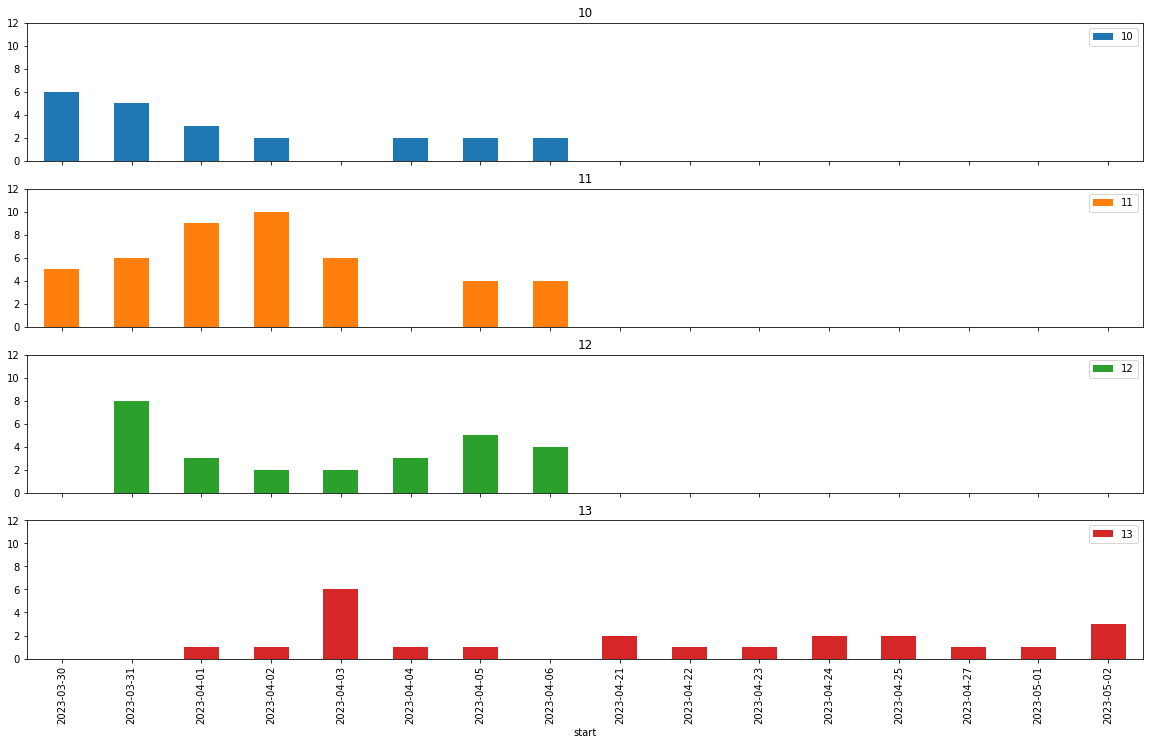

In [131]:
pd.pivot_table(ff.reset_index(),
               index='start', columns='user', values='measurement'
              ).plot.bar(subplots=True, layout=(10,1),figsize=(20, 30),ylim=[0, 12])

In [133]:
pp2 = annotations.groupby(['type'])
ff2 = pp2.agg({'measurement':'count'})
(ff2)


# pd.pivot_table(ff2.reset_index(),
#                index='start', columns='type', values='measurement'
#               ).plot.bar(subplots=False, layout=(10,2),figsize=(10,10),ylim=[0, 4])

,measurement
type,
EV charging,1
computer,2
dishwasher,12
housework,2
kettle,34
meal_breakfast,6
meal_dinner,7
meal_lunch,5
other,5


In [134]:
pp2 = bookings.groupby(['type','consumption'])
ff2 = pp2.agg({'measurement':'count'})
(ff2)


measurement
type                      consumption             
dishwasher                0.318329               1
                          0.539676               1
                          1.418313               1
kettle                    0.205945               1
                          0.207855               1
showering_and_hair-drying 0.441383               1
                          0.550295               1
washing_and_drying        0.545629               1
                          0.612011               1
                          0.647963               1
                          0.666237               1
                          0.832931               1
                          1.180735               1